Game of Thrones Death Prediction: Initial Data Exploration

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [9]:
df = pd.read_csv(os.path.join('character-deaths.csv'))
df2 = pd.read_csv(os.path.join('character-predictions.csv'))
df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,...,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,...,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,...,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,...,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,...,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,...,0,0,1,0,0


In [10]:
df2.head()

,S.No,actual,pred,alive,plod,...,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,...,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,...,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,...,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,...,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,...,0,0,0,0.043478,1


In [11]:
df.describe()

/Users/RenaChiu/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,...,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,...,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,...,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Starting with just a quick look at the different columns 

df2.describe()

,S.No,actual,pred,alive,plod,...,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,...,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,...,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,...,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,...,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,...,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.columns

Index([u'Name', u'Allegiances', u'Death Year', u'Book of Death',
       u'Death Chapter', u'Book Intro Chapter', u'Gender', u'Nobility', u'GoT',
       u'CoK', u'SoS', u'FfC', u'DwD'],
      dtype='object')

In [14]:
df2.columns

Index([u'S.No', u'actual', u'pred', u'alive', u'plod', u'name', u'title',
       u'male', u'culture', u'dateOfBirth', u'DateoFdeath', u'mother',
       u'father', u'heir', u'house', u'spouse', u'book1', u'book2', u'book3',
       u'book4', u'book5', u'isAliveMother', u'isAliveFather', u'isAliveHeir',
       u'isAliveSpouse', u'isMarried', u'isNoble', u'age', u'numDeadRelations',
       u'boolDeadRelations', u'isPopular', u'popularity', u'isAlive'],
      dtype='object')

Let's just look at the second dataset and start with a correlation matrix

In [17]:
#I noticed here that there are two alive vs dead columns - "IsAlive" and "alive" and they are not in line with one another. 
#I believe the "alive" column is the prediction of the likelihood of death whereas "IsAlive" = 1 means that the character is currently alive.
df2.corr()

,S.No,actual,pred,alive,plod,...,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,1.000000,-0.128708,-0.168569,-0.181493,0.181493,...,0.092734,0.171157,0.170451,0.277761,-0.128712
actual,-0.128708,1.000000,0.359028,0.420795,-0.420795,...,-0.192444,-0.193736,-0.153860,-0.183174,0.997291
pred,-0.168569,0.359028,1.000000,0.894427,-0.894427,...,-0.260960,-0.276936,-0.286736,-0.344108,0.356483
alive,-0.181493,0.420795,0.894427,1.000000,-1.000000,...,-0.277407,-0.292399,-0.281480,-0.354584,0.417318
plod,0.181493,-0.420795,-0.894427,-1.000000,1.000000,...,0.277407,0.292399,0.281480,0.354584,-0.417318
...,...,...,...,...,...,...,...,...,...,...,...
numDeadRelations,0.092734,-0.192444,-0.260960,-0.277407,0.277407,...,1.000000,0.778845,0.532132,0.614984,-0.192444
boolDeadRelations,0.171157,-0.193736,-0.276936,-0.292399,0.292399,...,0.778845,1.000000,0.509797,0.592512,-0.193736
isPopular,0.170451,-0.153860,-0.286736,-0.281480,0.281480,...,0.532132,0.509797,1.000000,0.858696,-0.153860
popularity,0.277761,-0.183174,-0.344108,-0.354584,0.354584,...,0.614984,0.592512,0.858696,1.000000,-0.183223


In [ ]:
#isAlive is going to be my independant variable 
#I'm interested in seeing seeing how it correlates with other features such as "popularity" and "isNoble"
#To do that, I'm going to start with a scatter plot

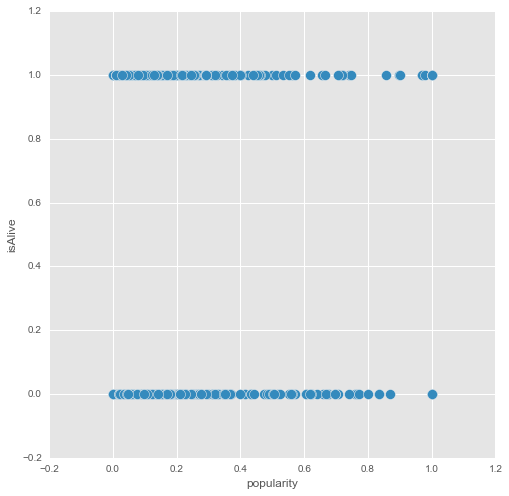

In [79]:
#It doesn't seem to be very correlated 
df2.plot(kind = 'scatter', x = 'popularity', y = 'isAlive', s = 100, figsize = (8, 8))

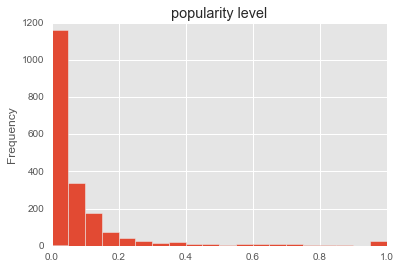

In [48]:
#There's a large population of characters that are popular
df2.popularity.plot(kind = 'hist', title = 'popularity level', range = (0, 1), bins = 20)

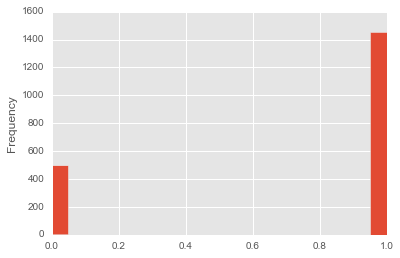

In [68]:
#There are way more characters that are alive versus the ones that are deceased.
df2.isAlive.plot(kind = 'hist', range = (0, 1), bins = 20)

In [64]:
table = pd.crosstab(index=df2["isAlive"], columns="popularity")
table

col_0,popularity
isAlive,
0,495
1,1451


In [65]:
table = pd.crosstab(index=df2["isAlive"], columns="isNoble")
table

col_0,isNoble
isAlive,
0,495
1,1451


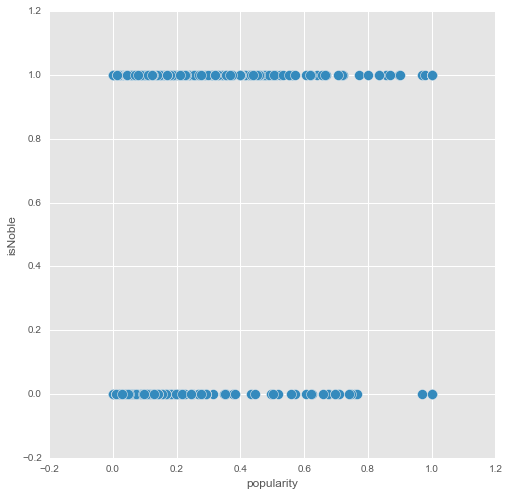

In [66]:
df2.plot(kind = 'scatter', x = 'popularity', y = 'isNoble', s = 100, figsize = (8, 8))

In [74]:
#it's confirmed that there's low correlation between isAlive and popularity

,S.No,actual,pred,alive,plod,...,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,1.000000,-0.128708,-0.168569,-0.181493,0.181493,...,0.092734,0.171157,0.170451,0.277761,-0.128712
actual,-0.128708,1.000000,0.359028,0.420795,-0.420795,...,-0.192444,-0.193736,-0.153860,-0.183174,0.997291
pred,-0.168569,0.359028,1.000000,0.894427,-0.894427,...,-0.260960,-0.276936,-0.286736,-0.344108,0.356483
alive,-0.181493,0.420795,0.894427,1.000000,-1.000000,...,-0.277407,-0.292399,-0.281480,-0.354584,0.417318
plod,0.181493,-0.420795,-0.894427,-1.000000,1.000000,...,0.277407,0.292399,0.281480,0.354584,-0.417318
...,...,...,...,...,...,...,...,...,...,...,...
numDeadRelations,0.092734,-0.192444,-0.260960,-0.277407,0.277407,...,1.000000,0.778845,0.532132,0.614984,-0.192444
boolDeadRelations,0.171157,-0.193736,-0.276936,-0.292399,0.292399,...,0.778845,1.000000,0.509797,0.592512,-0.193736
isPopular,0.170451,-0.153860,-0.286736,-0.281480,0.281480,...,0.532132,0.509797,1.000000,0.858696,-0.153860
popularity,0.277761,-0.183174,-0.344108,-0.354584,0.354584,...,0.614984,0.592512,0.858696,1.000000,-0.183223


In [99]:
df2_alive = df2[df2.isAlive == 1]

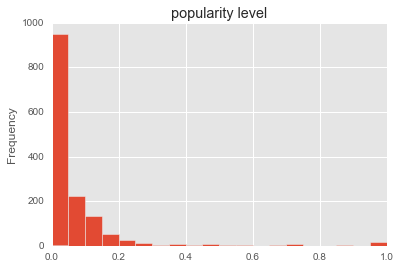

In [95]:
df2_alive.popularity.plot(kind = 'hist', title = 'popularity level', range = (0, 1), bins = 20)